In [174]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz, DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from IPython.display import Image
import warnings
warnings.simplefilter('ignore')


%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg' 


from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

In [175]:
df = pd.read_csv('insurance.csv')

In [176]:
def recode():
    df.replace('female',0,inplace=True)
    df.replace('male', 1, inplace=True)
    df.replace('yes', 1, inplace=True)
    df.replace('no',0,inplace=True)
    df.replace('southwest',1,inplace=True)
    df.replace('southeast', 2, inplace=True)
    df.replace('northwest', 3, inplace=True)
    df.replace('northeast', 4, inplace=True)


recode()
df['smoker'] = df['smoker'].astype(int)
df['sex'] = df['sex'].astype(int)
df['region'] = df['region'].astype(int)
df['bmi'] = df['bmi'].astype(float)
df['charges'] = df['charges'].astype(int)

In [177]:
lst = [df]

for col in lst:
    col.loc[col["bmi"] < 18.5, "bmi_new"] = "0"
    col.loc[(col["bmi"] >= 18.5) & (col["bmi"] < 25), "bmi_new"] = "1"
    col.loc[col["bmi"] >= 25, "bmi_new"] = "2"
del df['bmi']
df['bmi_new'] = df['bmi_new'].astype(int)
for col in lst:
    col.loc[col["charges"] < 10000, "charges_new"] = "0"
    col.loc[(col["charges"] >= 10000) & (col["charges"] < 20000), "charges_new"] = "1"
    col.loc[col["charges"] >= 20000, "charges_new"] = "2"
del df['charges']

In [178]:
df



,age,sex,children,smoker,region,bmi_new,charges_new
0,19,0,0,1,1,2,1
1,18,1,1,0,2,2,0
2,28,1,3,0,2,2,0
3,33,1,0,0,3,1,2
4,32,1,0,0,3,2,0
...,...,...,...,...,...,...,...
1333,50,1,3,0,3,2,1
1334,18,0,0,0,4,2,0
1335,18,0,0,0,2,2,0
1336,21,0,0,0,1,2,0


In [179]:
y = df['charges_new']
df = df.drop(['charges_new'],axis=1)


In [180]:
accuracy = []
name = []

DecisionTree

In [181]:
X_train, X_holdout, y_train, y_holdout = train_test_split(df.values, y, test_size=0.3,
random_state=17)

In [182]:
tree = DecisionTreeClassifier(max_depth=5, random_state=17)

In [183]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=17, splitter='best')

In [184]:
from sklearn.metrics import accuracy_score

tree_pred = tree.predict(X_holdout)


In [185]:
graph = DecisionTreeClassifier(max_depth=2)
graph.fit(X_train, y_train)
#export_graphviz(graph, feature_names=['age', 'sex', 'children', 'smoker', 'region', 'bmi_new'], out_file='tree.dot', filled=True)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [186]:
accuracy_score(y_holdout, tree_pred)



0.8781094527363185

In [187]:
name.append('DecisionTree')
accuracy.append(accuracy_score(y_holdout, tree_pred))

KNN!!!

In [188]:
X_train, X_holdout, y_train, y_holdout = train_test_split(df.values, y, test_size=0.3,
random_state=17)

In [189]:
knn = KNeighborsClassifier(n_neighbors=7)

 

In [190]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [191]:
knn_pred = knn.predict(X_holdout)
accuracy_score(y_holdout, knn_pred)

0.7810945273631841

In [192]:
name.append('KNN')
accuracy.append(accuracy_score(y_holdout, knn_pred))

Logistic regression 

In [193]:
log = LogisticRegression(max_iter = 500 , penalty = 'l2' , random_state = 0 )
log.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [194]:
lr_pred = log.predict(X_holdout)


In [195]:
accuracy_score(y_holdout,lr_pred)

0.8308457711442786

In [196]:
name.append('Logistic regression')
accuracy.append(accuracy_score(y_holdout,lr_pred))

Linear regression

In [197]:
X_train, X_holdout, y_train, y_holdout = train_test_split(df.values, y, test_size=0.3,
random_state=17)

In [198]:
clf = LinearRegression()
   

In [199]:
clf.fit(X_train,y_train)
  
acc = clf.score(X_holdout,y_holdout)


In [200]:
name.append('Linear regression')
accuracy.append(clf.score(X_holdout,y_holdout))

RandomForest

In [201]:
rf = RandomForestClassifier(max_depth = 20 , random_state = 0)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [202]:
rf_pred = rf.predict(X_holdout)
accuracy_score(y_holdout,rf_pred)

0.8681592039800995

In [203]:
name.append('RandomForest')
accuracy.append(accuracy_score(y_holdout,rf_pred))

GradientBoosting

In [204]:
gbr = GradientBoostingClassifier(n_estimators=3, max_depth=3, learning_rate=1, random_state=1)


In [205]:
gbr.fit(X_train, y_train)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=3,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [206]:
gbr_pred = gbr.predict(X_holdout)

In [207]:
accuracy_score(y_holdout,gbr_pred)

0.8880597014925373

In [208]:
name.append('GradientBoosting')
accuracy.append(accuracy_score(y_holdout,gbr_pred))

In [209]:
accuracy = pd.Series(accuracy)

In [210]:
name = pd.Series(name)

In [211]:
result = pd.DataFrame({'name': name, 'accuracy': accuracy})

In [212]:
result

,name,accuracy
0,DecisionTree,0.878109
1,KNN,0.781095
2,Logistic regression,0.830846
3,Linear regression,0.617193
4,RandomForest,0.868159
5,GradientBoosting,0.888060


In [213]:
result.sort_values(by=['accuracy'], ascending = False)

,name,accuracy
5,GradientBoosting,0.888060
0,DecisionTree,0.878109
4,RandomForest,0.868159
2,Logistic regression,0.830846
1,KNN,0.781095
3,Linear regression,0.617193


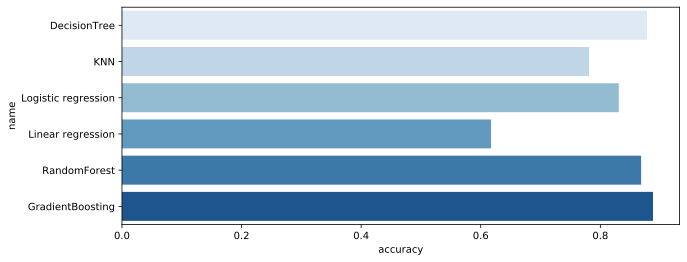

In [214]:
plt.figure(figsize=(10,4))
sns.barplot(x='accuracy', y='name', data=result, palette='Blues')

plt.show()

## As a result of testing trained models, we see that Gradient Boosting is the best